In [3]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mlp.data_providers import CIFAR10DataProvider, CIFAR100DataProvider, AugmentedCIFAR10DataProvider


which_set = 'valid'


def load_data(file_name):
    data_path = os.path.join(os.environ['MLP_DATA_DIR'], file_name)
    loaded = np.load(data_path)
    inputs, targets, label_map = loaded['inputs'], loaded['targets'], loaded['label_map']

    inputs = inputs.reshape((inputs.shape[0], -1)).astype('float32')
    
    return inputs, targets, label_map

def show_images(data):
    inputs, targets, label_map = data
    X = inputs
    X = X.reshape(X.shape[0], 1, 32, 32).astype("float")

    #Visualizing CIFAR 10
    fig, axes1 = plt.subplots(5,5,figsize=(3,3))
    for j in range(5):
        for k in range(5):
            i = np.random.choice(range(len(X)))
            axes1[j][k].set_axis_off()
            print X[i:i+1][0].shape
            axes1[j][k].imshow(X[i:i+1][0][0], cmap='gray')
    fig.show()
    raw_input()



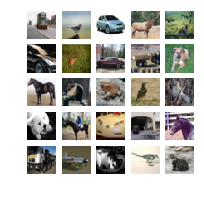

[[[ 0.00057968  0.04239043  0.04987003 ...,  0.0857698   0.01435415
    0.00576686]
  [ 0.00548835  0.03309989  0.0793457  ...,  0.00471513  0.08153531
    0.02970456]
  [ 0.04029233  0.07072731  0.08627408 ...,  0.07592169  0.01890534
    0.08804398]
  ..., 
  [ 0.02470791  0.08248204  0.0552065  ...,  0.0788307   0.01507268
    0.08010298]
  [ 0.05197883  0.08789569  0.06076255 ...,  0.00301045  0.07241501
    0.05523302]
  [ 0.01961164  0.04544009  0.09429798 ...,  0.07271288  0.04512038
    0.09525242]]

 [[ 0.08805552  0.01487922  0.01360051 ...,  0.03772516  0.03282429
    0.03590352]
  [ 0.03818359  0.09338459  0.03400165 ...,  0.08162433  0.0495016
    0.07918946]
  [ 0.01265099  0.05655018  0.00471444 ...,  0.00179033  0.01127007
    0.08654869]
  ..., 
  [ 0.04346062  0.05957851  0.09856685 ...,  0.01541217  0.04118655
    0.06788461]
  [ 0.03030721  0.00791809  0.02662977 ...,  0.06258815  0.06123887
    0.05567892]
  [ 0.06370822  0.09150512  0.06479591 ...,  0.04665332  0.

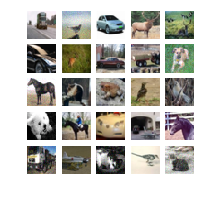

In [8]:

def random_flip(inputs, rng):
    orig_ims = inputs.reshape((-1, 3, 32, 32)).transpose(0,1,3,2)
    indices = rng.choice(orig_ims.shape[0], orig_ims.shape[0] // 4, False)
    for idx, item in enumerate(indices):
        orig_ims[item] = np.fliplr(orig_ims[item])
    return orig_ims.transpose(0,1,3,2).reshape((-1, 3072))

def random_bright(inputs, rng):
    orig_ims = inputs.reshape((-1, 3, 32, 32)).transpose(0,1,3,2)
    indices = rng.choice(orig_ims.shape[0], orig_ims.shape[0] // 4, False)
    bright = rng.uniform(0.5,2)
    for idx, item in enumerate(indices):
        orig_ims[item] = orig_ims[item]*bright
    orig_ims[orig_ims>=1] = 1
    return orig_ims.transpose(0,1,3,2).reshape((-1, 3072))


def random_noise(inputs, rng):
    orig_ims = inputs.reshape((-1, 3, 32, 32))
    indices = rng.choice(orig_ims.shape[0], orig_ims.shape[0] // 4, False)
    noise = rng.uniform(0,0.1,size=(3,32,32))
    print noise
    for idx, item in enumerate(indices):
        orig_ims[item] = orig_ims[item]+noise
    orig_ims[orig_ims>=1] = 1.
    orig_ims[orig_ims<=0] = 0.
    return orig_ims.reshape((-1, 3072))


# def random_flip(inputs, rng):
#     start = time.time()
#     orig_ims = inputs.reshape((-1, 3, 32, 32 )).transpose(0,1,3,2)
#     break1 = time.time()
#     result = tf.map_fn(lambda img: tf.image.random_flip_left_right(img) if rng.uniform() > 0.5 else img, orig_ims)
#     break2 = time.time()
#     result = result.eval().transpose(0,1,3,2).reshape((-1, 3072))
#     break3 = time.time()
#     print "{0} {1} {2}".format(break1-start,break2-break1,break3-break1)
#     return result





def show_batch_with_augmentation(rng=None):
    train_data = CIFAR10DataProvider('train-original', batch_size=25, shuffle_order=False,rng=rng)
    inputs = train_data.next()[0]
    X = inputs.reshape(inputs.shape[0], 3, 32, 32)
    X = X.transpose(0,2,3,1).astype("float")

    fig, axes1 = plt.subplots(5,5,figsize=(3,3))
    count = 0
    for j in range(5):
        for k in range(5):
            axes1[j][k].set_axis_off()
            axes1[j][k].imshow(X[count:count+1][0])
            count = count + 1

    plt.show()

    aug_data = AugmentedCIFAR10DataProvider('train-original', batch_size=25, transformer=random_noise, shuffle_order=False, rng=rng)

    inputs = aug_data.next()[0]
    X = inputs.reshape(inputs.shape[0], 3, 32, 32)
    X = X.transpose(0,2,3,1).astype("float")

    fig2, axes2 = plt.subplots(5,5,figsize=(3,3))
    count = 0
    for j in range(5):
        for k in range(5):
            axes2[j][k].set_axis_off()
            axes2[j][k].imshow(X[count:count+1][0])
            count = count + 1
    plt.show()



seed = 7474747 
rng = np.random.RandomState(seed)

show_batch_with_augmentation(rng)

In [84]:
a = [list(np.fliplr(channel)) for channel in np.rollaxis(QQQ,2)]
print (a.shape)


AttributeError: 'list' object has no attribute 'shape'

In [87]:
print QQQ[:,:,0].shape

(32, 32)


In [10]:
QQQ.get_shape()

TensorShape([Dimension(32), Dimension(32), Dimension(3)])

In [11]:
QQQ.dtype

tf.float16

In [24]:
QQQ.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'Reverse_4:0' shape=(32, 32, 3) dtype=float16>>